#### load in modules

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

#### read in output from simulated sampling

In [4]:
simulated_samples = pd.read_csv('./results/detection_numbers_by_time.csv')

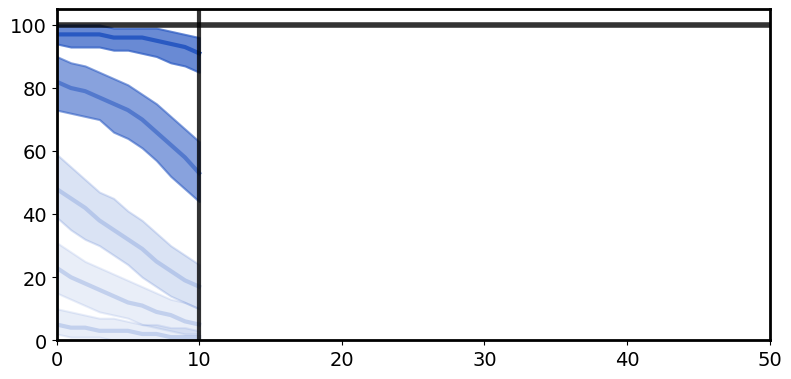

In [14]:
fig, ax = plt.subplots(figsize=(9.2, 4.3))

# add horizontal line to indicate true importation rate
true_importation_rate = 100 # adjust as needed 
ax.axhline(y=true_importation_rate, color='black', linewidth=4, linestyle='-', alpha=0.8)

# plot detection numbers
sfs2plot = [0.01, 0.05, 0.15, 0.5, 0.9]

# plot median and 95% CI
for sf in sfs2plot:
    ax.plot(simulated_samples[simulated_samples.sf == sf].time,simulated_samples[simulated_samples.sf == sf]['median'],
            label='A, sf=%.2f' % sf, linestyle='-',
            color='#2959c2',
            linewidth=3, alpha=max(0.2, sf / (max(sfs2plot))))
    ax.fill_between(simulated_samples[simulated_samples.sf == sf].time, simulated_samples[simulated_samples.sf == sf].lw_95CI,
                    simulated_samples[simulated_samples.sf == sf].up_95CI,
                    color='#2959c2',
                    alpha=min(0.7, max(0.1, sf / (max(sfs2plot)))), linewidth=1.5)

# add vertical line at time of last inferred importation time
last_importation_time = simulated_samples['time'].max()
ax.axvline(x=last_importation_time, color='black', linewidth=3, linestyle='-', alpha=0.8)

# set x limits
ax.set_xlim([0, last_importation_time + 40])
ax.set_ylim([0, true_importation_rate + 5])

# adjust x-axis font size
plt.xticks(fontsize=14)
# adjust y-axis font size
plt.yticks(fontsize=14)

# add plot border
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)